# Superstore Sales Story: From Raw Data to Business Insight

### Objective: Analyze sales performance across categories and regions to support management decisions.

# Data Loading and Inspection

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
"""load our data to dataframe"""
df = pd.read_csv('Superstore sales.csv')


In [ ]:
# Show the first 5 rows of our data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


# Data Cleaning

In [ ]:
# Convert order date to datetime and create new column Year
df['Order Date'] = pd.to_datetime(df['Order Date'], errors = 'coerce')
df['Year'] = df['Order Date'].dt.year

In [ ]:
# Renaming columns
df = df.rename(
    columns = {
        'Ship Mode': 'Shipping Method'
    }
)

In [ ]:
# Fill the missing values in postal code column with zeroes
df['Postal Code'].fillna(0)

,Postal Code
0,42420.0
1,42420.0
2,90036.0
3,33311.0
4,33311.0
...,...
9795,60610.0
9796,43615.0
9797,43615.0
9798,43615.0


In [ ]:
# Recheck for missing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,5841
Ship Date,0
Shipping Method,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Dropping the missing values from our data
df = df.dropna()

# Analysis

In [ ]:
# Which product categories generate the most revenue
category_sales = (
    df.groupby('Category')['Sales']
    .sum()
    .sort_values(ascending=False)
)
category_sales

,Sales
Category,
Technology,332344.3100
Furniture,280442.7726
Office Supplies,252956.1610


### Technology category generates the most revenue

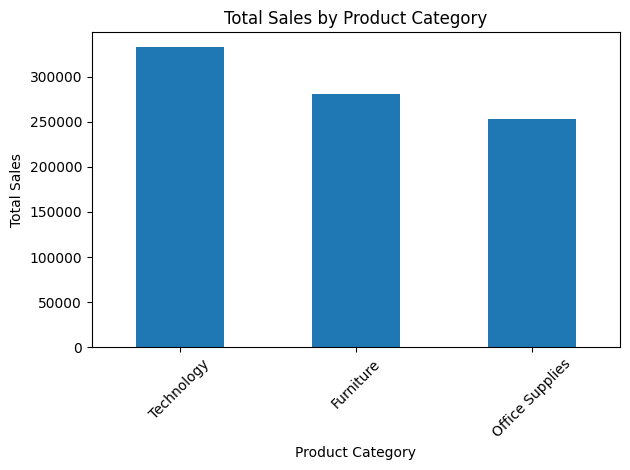

In [ ]:
# The sales by product category plot
category_sales.plot(kind='bar')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Technology leads with the most total sales.

In [ ]:
# How have the sales changed over time?
sales_by_year = df.groupby('Year')['Sales'].sum()
sales_by_year

,Sales
Year,
2015.0,176986.5857
2016.0,157448.7627
2017.0,264959.8509
2018.0,266348.0443


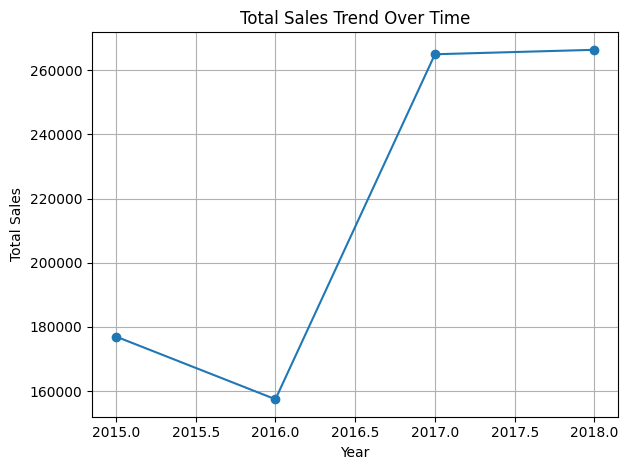

In [ ]:
# Sales over time plot
sales_by_year.plot(marker='o')
plt.title("Total Sales Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid()
plt.tight_layout()
plt.show()

### Theres a decline in sales from 2015 to 2016, then there's an exponential rise in sales from 2016 to 2017, from 2017 to 2018 the growth in sales is minimal

In [ ]:
# Filtering for the tech category in the west region
tech_west = df[
    (df['Category'] == 'Technology') &
    (df['Region'] == 'West')
]

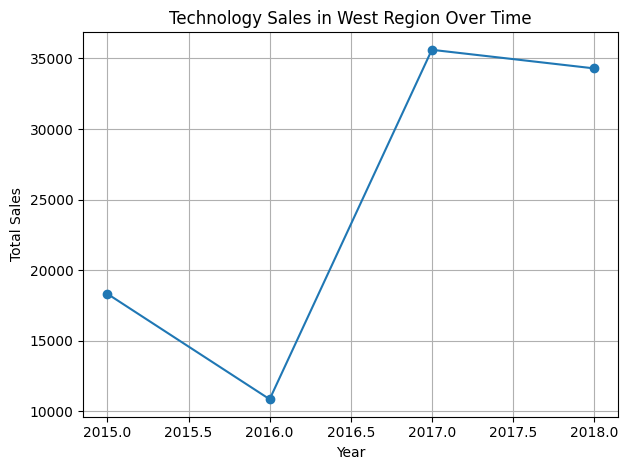

In [ ]:
# Plotting tech sales in the west region
tech_west.groupby('Year')['Sales'].sum().plot(marker='o')
plt.title("Technology Sales in West Region Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid()
plt.tight_layout()
plt.show()

### Technology sales in the seem to be volatile with sharp declines and sharp rise over the four years. The main worry is the 2017-2018 decline.

# Key Insights and Recommendations

### 1. Technology category generates strong overall revenue but shows some volatility.

### 2. Sales peaked in certain years, suggesting possible market saturation or external factors.

### 3. Management should investigate customer segments or product lines within Technology in the West.